# SCORE PREDICTOR

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway


In [3]:
# Reading CSV file
df = pd.read_csv('/content/StudentsPerformance.csv')

In [4]:
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [5]:
df.shape #Shape

(1000, 8)

In [6]:
# Describing Numberical features
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
# Identify missing values to prepare for imputation or removal
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [8]:
df.dtypes.value_counts()

,count
object,5
int64,3


In [9]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Print them
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)
print("Number of Numerical Columns:", len(numerical_cols))
print("Number of Categorical Columns:", len(categorical_cols))

Numerical Columns: ['math score', 'reading score', 'writing score']
Categorical Columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
Number of Numerical Columns: 3
Number of Categorical Columns: 5


In [10]:
# Unique Values
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [11]:
print("Gender Distribution:\n", df['gender'].value_counts(), "\n")
print("Race/Ethnicity Distribution:\n", df['race/ethnicity'].value_counts(), "\n")
print("Parental Education Level Distribution:\n", df['parental level of education'].value_counts(), "\n")
print("Lunch Type Distribution:\n", df['lunch'].value_counts(), "\n")
print("Test Preparation Course Distribution:\n", df['test preparation course'].value_counts(), "\n")

Gender Distribution:
 gender
female    518
male      482
Name: count, dtype: int64 

Race/Ethnicity Distribution:
 race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64 

Parental Education Level Distribution:
 parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64 

Lunch Type Distribution:
 lunch
standard        645
free/reduced    355
Name: count, dtype: int64 

Test Preparation Course Distribution:
 test preparation course
none         642
completed    358
Name: count, dtype: int64 



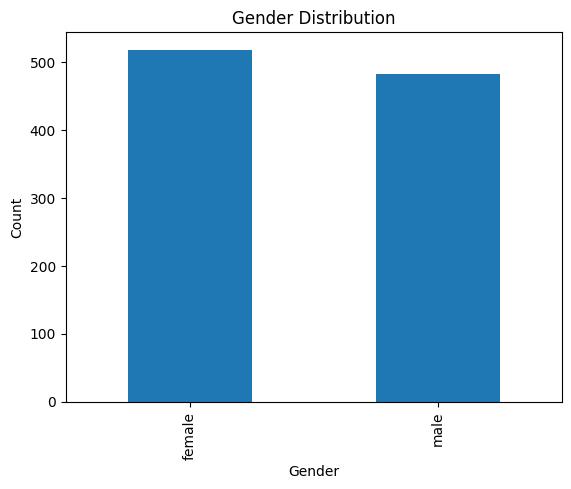

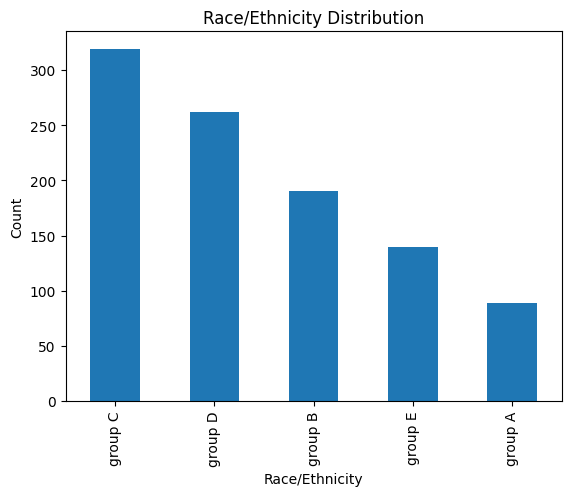

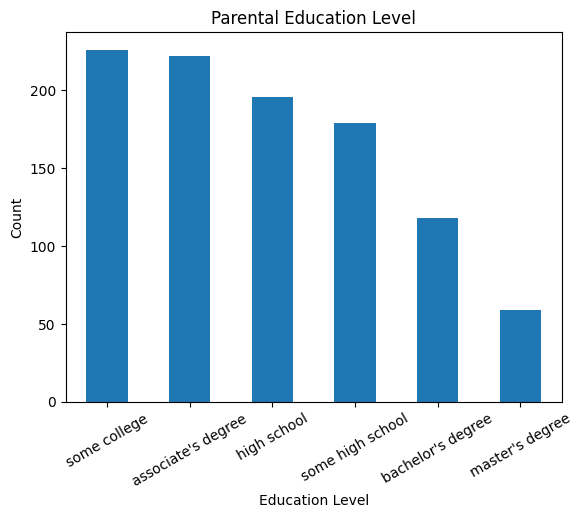

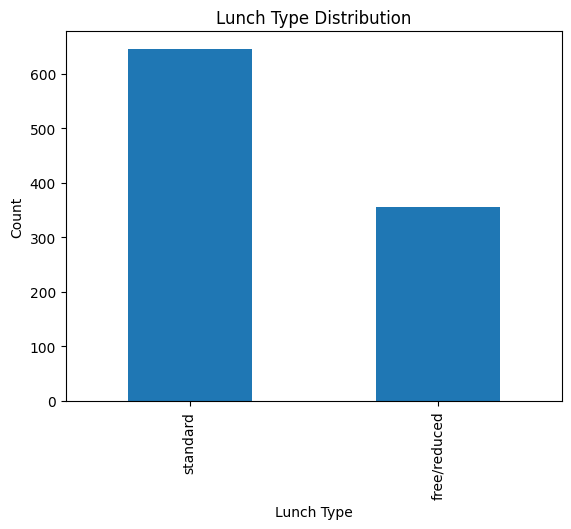

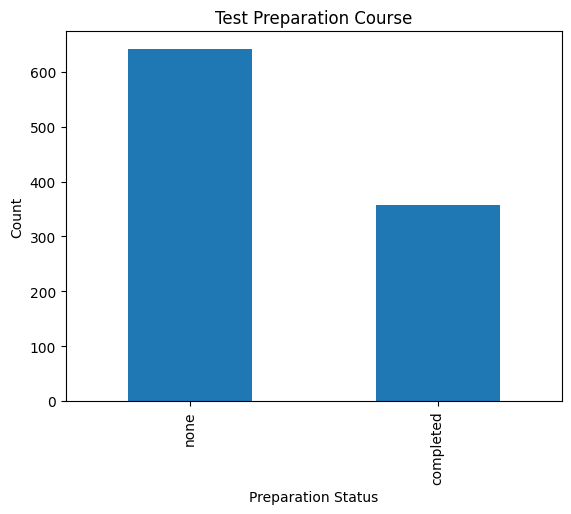

In [12]:
df['gender'].value_counts().plot(kind='bar', title='Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

df['race/ethnicity'].value_counts().plot(kind='bar', title='Race/Ethnicity Distribution')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.show()

df['parental level of education'].value_counts().plot(kind='bar', title='Parental Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

df['lunch'].value_counts().plot(kind='bar', title='Lunch Type Distribution')
plt.xlabel('Lunch Type')
plt.ylabel('Count')
plt.show()

df['test preparation course'].value_counts().plot(kind='bar', title='Test Preparation Course')
plt.xlabel('Preparation Status')
plt.ylabel('Count')
plt.show()


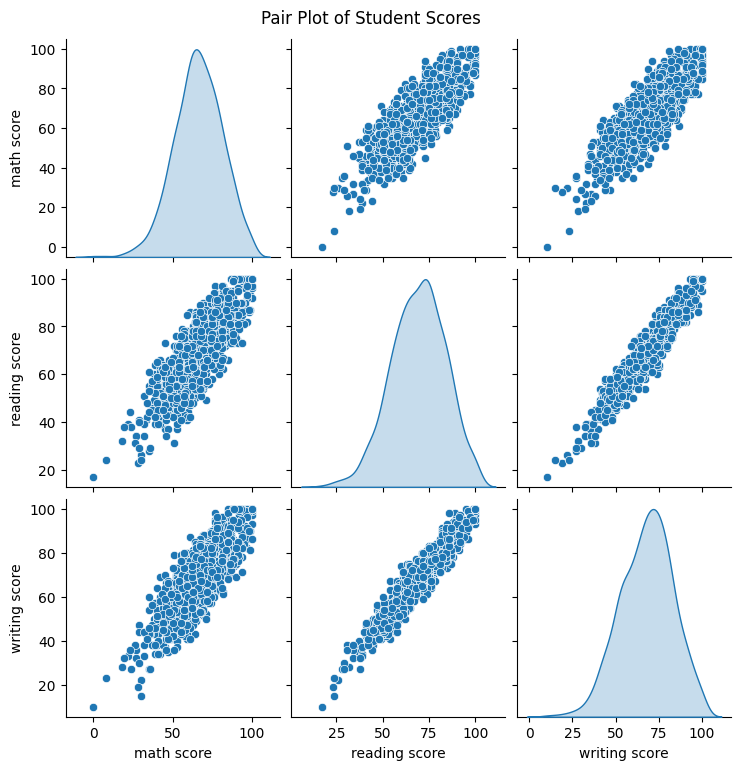

In [137]:
sns.pairplot(df[numerical_cols], diag_kind='kde')  # Use 'hist' instead of 'kde' if needed
plt.suptitle("Pair Plot of Student Scores", y=1.02)  # optional title
plt.show()

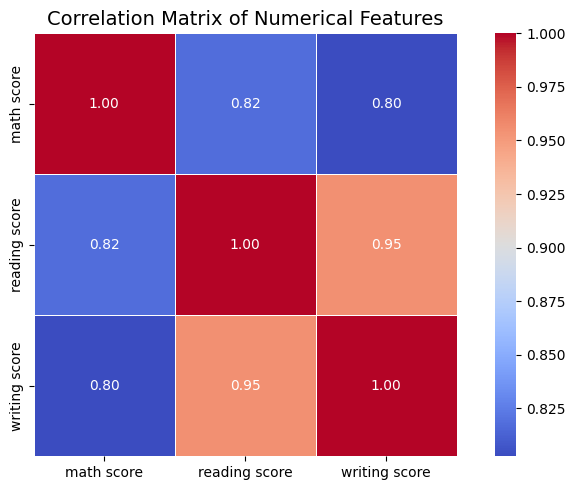

In [99]:
# Use only numerical columns
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()


In [139]:
target_scores = ['math score', 'reading score', 'writing score']

# Loop through each score to test impact of parental education
for score in target_scores:
    print(f"\n Testing impact on: {score}")

    # Create a list of groups based on parental education
    groups = [df[df['parental level of education'] == level][score]
              for level in df['parental level of education'].unique()]

    # Perform ANOVA
    f_stat, p_val = f_oneway(*groups)
    print(f"F-Statistic: {f_stat:.2f}, P-Value: {p_val:.4f}")

    # Interpret the result
    if p_val < 0.05:
        print("Statistically significant: Parental education impacts this score.")
    else:
        print("Not statistically significant: No strong evidence for impact.")


 Testing impact on: math score
F-Statistic: 6.52, P-Value: 0.0000
Statistically significant: Parental education impacts this score.

 Testing impact on: reading score
F-Statistic: 9.29, P-Value: 0.0000
Statistically significant: Parental education impacts this score.

 Testing impact on: writing score
F-Statistic: 14.44, P-Value: 0.0000
Statistically significant: Parental education impacts this score.


In [48]:
# Imports for Machine Learning
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [49]:
X = df.drop(columns=['math score'])
y = df['math score']

In [50]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 7)
(200, 7)
(800,)
(200,)


In [58]:
# Encoding and Scaling
ohe = OneHotEncoder(sparse_output=False, drop='first')
oe = OrdinalEncoder()
scalar = StandardScaler()

In [59]:
# Defining Numerical Columns
numerical_cols = ['reading score', 'writing score']

# Preprocessor for pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', ohe, ['gender', 'race/ethnicity', 'lunch', 'test preparation course']),
        ('ordinal', oe, ['parental level of education']),
        ('scale', scalar, numerical_cols)
    ])

In [73]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha = 0.1))
])

In [74]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['gender', 'race/ethnicity',
                                                   'lunch',
                                                   'test preparation course']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['parental level of '
                                                   'education']),
                                                 ('scale', StandardScaler(),
                                                  ['reading score',
                                                   'writing score'])])),
                ('model', Lasso(alpha=0.1))])

In [77]:
y_pred = pipeline.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
scores = cross_val_score(pipeline, X_train, y_train, cv=5)

print(f"MAE  = {mae:.4f}")
print(f"MSE  = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")
print(f"CV   = {scores.mean():.4f}")


MAE  = 4.1592
MSE  = 28.9638
RMSE = 5.3818
R²   = 0.8810
CV   = 0.8666


Text(0, 0.5, 'Predicted Values')

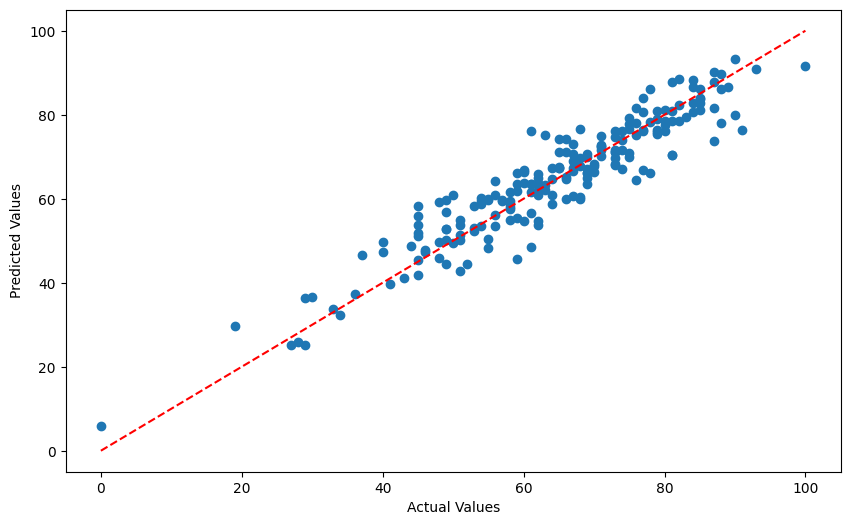

In [78]:
# Actual Vs Predicted Values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')



In [96]:
# Saving Model
import joblib
joblib.dump(pipeline, 'model.pkl')

['model.pkl']

In [100]:
# Model Loading
# Step 1: Load the trained pipeline
pipeline = joblib.load('model.pkl')

# Step 2: Define the new input as a DataFrame
new_data = {
    'gender': ['female'],
    'race/ethnicity': ['group B'],
    'parental level of education': ["bachelor's degree"],
    'lunch': ['standard'],
    'test preparation course': ['completed'],
    'reading score': [88],
    'writing score': [86]
}
new_df = pd.DataFrame(new_data)  # Convert to 2D DataFrame

# Step 3: Make the prediction
predicted_math = pipeline.predict(new_df)
print(f" Predicted Math Score: {predicted_math[0]:.2f}")

 Predicted Math Score: 76.13
